Bacha: pohlídat audioknihy.
Bacha 2: filtrovat posmrtně vydané knihy.

In [2]:
import os
import re
import statistics
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet'))

In [5]:
sloupce = ['leader','245','080','655','072','100','041','964']

In [6]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [7]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20021067474,020218s2002 xr e p 001 0 cze,nam a22 a 4500,1,0,Právo sociálního zabezpečení /,None,Petr Tröster a kolektiv,None,None,None,None,None,"[349.3, (437.3), (075)]","[MRF, MRF, MRF]",None,None,None,"[7, 9]","[učebnice, Textbooks]","[fd133770, None]","[czenas, eczenas]",None,None,None,None,[7],[349],"[Pracovní, sociální, stavební právo. Právo živ...",[Konspekt],[16],1,"Tröster, Petr,",jk01140217,[aut],1939-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nkc20172903486,170622s2017 xr a e f 000 0 cze,nam a22 i 4500,1,0,Cesta kolem těla ve 40 bodech :,příručka akupresury a čínské medicíny pro zlep...,Alejandro Lorente ; ze španělského originálu L...,None,None,None,None,None,"[615.8(315), 615.814, 616.8-009.7-08, (035)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 9]","[příručky, handbooks and manuals]","[fd133209, None]","[czenas, eczenas]",None,None,None,None,[7],[615.8],[Fyzioterapie. Psychoterapie. Alternativní lék...,[Konspekt],[14],1,"Lorente, Alejandro",hka2017969748,[aut],None,(Lorente García-Mauriño),None,None,None,1,[cze],[spa],None,None,None,None,None,None,None,None,None,None,NaN
hud07701142,090120s1859 xr hyg g nn ger,ncm a22 i 4500,1,0,Hymne zu Ehren des heiligen Vaters Pius IX. /,None,von Josef Wenzig ; in Musik gesetzt von Joh.Ne...,None,None,None,None,None,"[783.4, 783, 78.089.6]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9, 9]","[duchovní hudba, duchovní hymny, partitury, sa...","[fd979823, fd994973, fd185981, None, None, Non...","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[784],[Vokální hudba],[Konspekt],[9],1,"Škroup, Jan Nepomuk,",jk01130391,[cmp],1811-1892,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk195503279,981205s1955 xr cze,nam a22 1 4500,1,0,Cyklista v dopravě /,None,Josef Fürst ; il. navrhl Karel Helmich,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Fürst, Josef",xx0104330,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Doprava silniční - pravidla pro cyklisty - ob...
nkc20152678759,150408s2015 xr a e f 001 0 cze,nam a22 a 4500,0,0,Pošli recept! :,jídla za pár korun /,[editorka Lenka Nešporová ; fotografie uvnitř ...,None,None,None,None,None,"[641.55, (083.12)]","[MRF, MRF]",None,None,None,"[7, 9]","[kuchařské recepty, cookbooks]","[fd132687, None]","[czenas, eczenas]",None,None,None,None,[7],[641],[Kuchařství. Potraviny. Vařená jídla],[Konspekt],[19],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk192704631,001001s1927 xr cze,nam a22 1 4500,0,0,Železniční nákladní tarif =,Kolejowa taryfa towarowa ....,None,"[Díl II., Sešit 1, pro přepravu kamenného uhlí...",None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"[cze, pol]",None,None,None,None,None,None,None,None,None,None,None,NaN
nkc20112174196,110311s2010 xr a fs 000 0 slo,nam a22 a 4500,1,0,Optimálny výber systémového debnenia,None,Jozef Bizub,None,None,[elektronický zdroj] /,None,None,"[69.057.5, 624.012.4, (048.8), (0.034.44)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[monografie, CD-ROM, monographs, CD-ROM]","[fd132842, fd133955, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[69],[Stavebnictví],[Konspekt],[19],1,"Bizub, Jozef",mzk2011636303,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk192601101,001014s1924 xr cze,nam a22 1 4500,1,0,A báseň život je ... :

In [8]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1244799 entries, ck8300078 to nkc20243644771
Data columns (total 53 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   008       1244799 non-null  object
 1   leader    1244799 non-null  object
 2   245_ind1  1244798 non-null  object
 3   245_ind2  1244799 non-null  object
 4   245_a     1244799 non-null  object
 5   245_b     602657 non-null   object
 6   245_c     1025904 non-null  object
 7   245_n     76515 non-null    object
 8   245_p     58551 non-null    object
 9   245_h     150447 non-null   object
 10  245_f     18 non-null       object
 11  245_s     4 non-null        object
 12  080_a     1025466 non-null  object
 13  080_2     1025466 non-null  object
 14  080_x     5 non-null        object
 15  080_9     1 non-null        object
 16  080_ind1  3 non-null        object
 17  655_ind2  892222 non-null   object
 18  655_a     892222 non-null   object
 19  655_7     891629 non-null   obje

In [9]:
df = df.explode('008')

In [10]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
        try:
            return int(nn8[7:11])
        except Exception as e:
            return None
        else:
            return None
    elif nn8[6] == 'q':
        try:
            rok1 = int(nn8[7:11])
            rok2 = int(nn8[11:15])
            if rok2 - rok1 <= 5:
                return int(statistics.median([rok1, rok2]))
            else:
                return None
        except:
            return None
    else:
        return None

In [11]:
def najdi_zub(frame):
    try:
        print("Hledám zub mezi lety 1900 a 1901.")
        nula = len(frame[frame['rok'] == 1900])
        jedna = len(frame[frame['rok'] == 1901])
        print(f"1900: {nula}, 1901: {jedna}, poměr: {nula / jedna}")
    except Exception as E:
        print(E)

In [12]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [13]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [14]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1990, 1901: 2260, poměr: 0.8805309734513275


<Axes: xlabel='rok'>

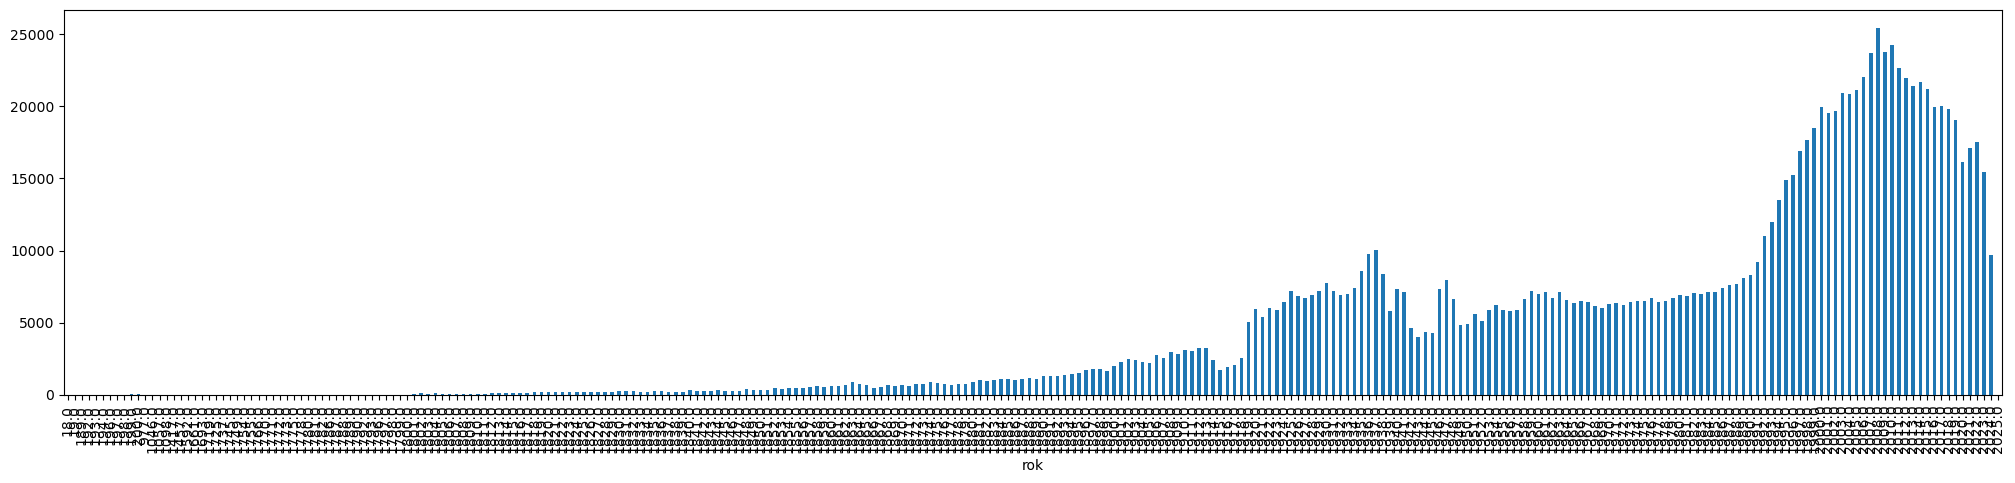

In [15]:
r(df)

In [16]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel /,None,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel.,None,Karin Lednická,"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
nkc20223472496,221116s2022 xr g 000 f eng,nam a22 i 4500,1,4,The leaning church :,chronicle of a town that vanished: 1894-1921 /,Karin Lednická ; English translation: Pavlína ...,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,1,[eng],[cze],None,None,None,None,None,None,None,None,None,None,NaN,2022.0
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [17]:
df = df[(df["008"].str[15:17] == "xr") & (df["008"].str[35:38] == "cze")]

In [18]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1527, 1901: 1980, poměr: 0.7712121212121212


<Axes: xlabel='rok'>

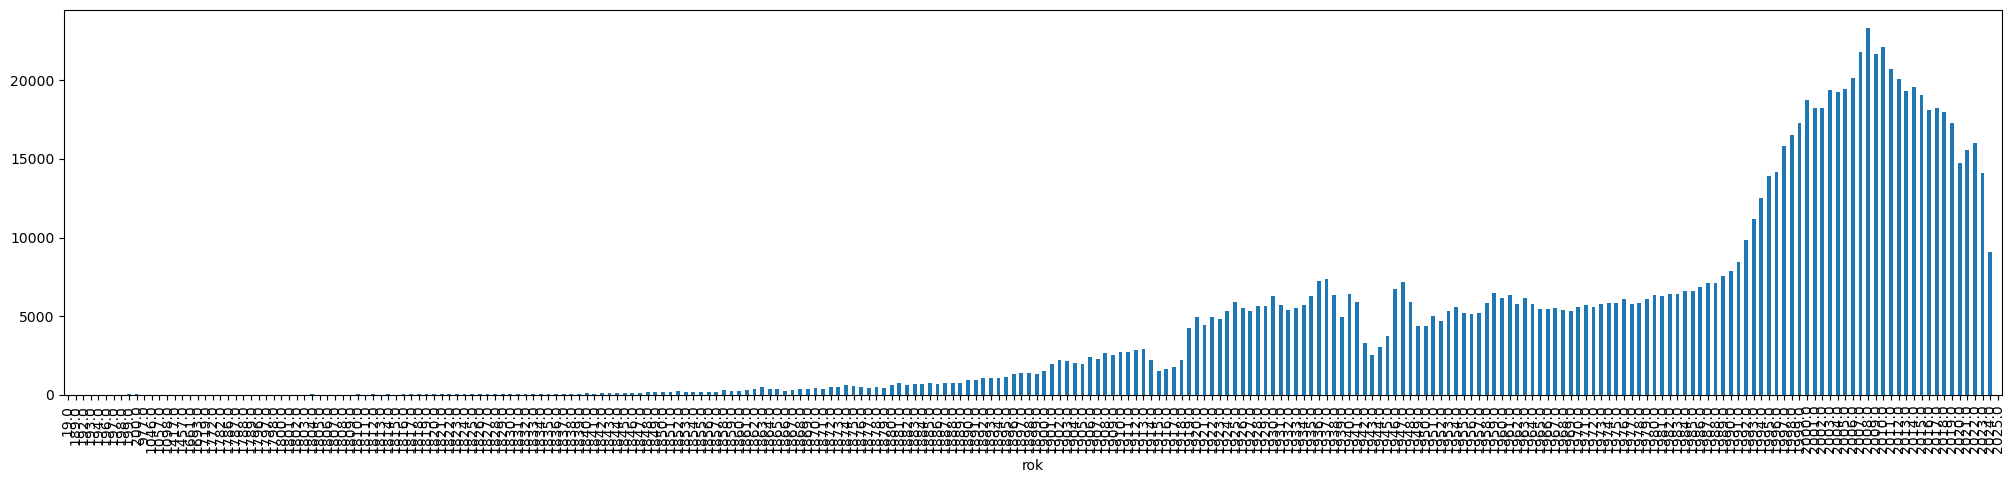

In [19]:
r(df)

In [20]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1086986 entries, ck8300078 to nkc20243644771
Data columns (total 54 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   008       1086986 non-null  object 
 1   leader    1086986 non-null  object 
 2   245_ind1  1086985 non-null  object 
 3   245_ind2  1086986 non-null  object 
 4   245_a     1086986 non-null  object 
 5   245_b     518765 non-null   object 
 6   245_c     899845 non-null   object 
 7   245_n     65571 non-null    object 
 8   245_p     52955 non-null    object 
 9   245_h     116053 non-null   object 
 10  245_f     16 non-null       object 
 11  245_s     3 non-null        object 
 12  080_a     905055 non-null   object 
 13  080_2     905055 non-null   object 
 14  080_x     5 non-null        object 
 15  080_9     1 non-null        object 
 16  080_ind1  3 non-null        object 
 17  655_ind2  784421 non-null   object 
 18  655_a     784421 non-null   object 
 19  655_7     7

In [21]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cps20183002232,180614c20189999xr mr p 0 b0cze,nas a22 i 4500,0,0,Zdraví,None,None,None,None,None,None,None,"[613, (051.062)]","[MRF, MRF]",None,None,None,[7],[populárně-naučné časopisy],[fd133086],[czenas],None,None,None,None,[7],[613],[Hygiena. Lidské zdraví],[Konspekt],[14],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
cpg20193096663,190507s2018 xr nnn g incze,nkm a22 i 4500,1,0,Básníci v prostoru Zlín :,Svatopluk Karásek a Svatopluk : vzpomínky na P...,foto Vojtěch Stádník,None,None,None,None,None,"[069.9, 821.162.3-1, (437.323), (084.5)069.9]","[MRF, MRF, MRF, MRF]",None,None,None,[7],[výstavní plakáty],[fd133861],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,1,"Stádník, Vojtěch",None,[pht],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
cpk19980371763,980916s1998 xr a e c 000 0dcze,nam a22 a 4500,1,0,Ferdinand Lepié (1824-1883) :,"[katalog výstavy, Ústí nad Labem, červenec 1998 /",autor katalogu a textu Karel Král],None,None,None,None,None,"[741/743, 75]","[undef, undef]",None,None,None,[7],[katalogy výstav],[fd132536],[czenas],None,None,None,None,[7],[75],[Malířství],[Konspekt],[21],1,"Lepié, Ferdinand,",jn20000401625,[aut],1824-1883,None,None,None,None,0,[cze],None,[eng],None,None,None,None,None,None,None,None,None,NaN,1998.0
cpg20112171450,110228s2010 xr nnn g kncze,nkm a22 a 4500,1,0,Kuchařka pro každý den 2011,None,"fotografie, úvod Věra Strnadová",None,None,[grafika] /,None,None,"[(083.12), (059)]","[MRF, MRF]",None,None,None,"[7, 7]","[kuchařské recepty, stolní kalendáře]","[fd132687, fd133595]","[czenas, czenas]",None,None,None,None,NaN,NaN,NaN,NaN,NaN,1,"Strnadová, Věra",jx20080226024,"[pht, cmm]",None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0
np9543617,950626s1995 xr ac e 000 0 cze,nam a22 4500,1,0,Židé v českých zemích :,(10. až 20. století) /,"Bedřich Nosek, Helena Krejčová",None,None,None,None,None,"[296, 943.7, 323.1]","[undef, undef, undef]",None,None,None,[7],[přehledy],[fd133202],[czenas],None,None,None,None,[7],[94(430/439)],[Dějiny zemí střední Evropy],[Konspekt],[8],1,"Nosek, Bedřich,",jk01090256,[aut],1942-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.0
bknaus13950,020720s1964 xr e f 000 0 cze,nam a22 1 4500,0,0,Učební osnovy středních všeobecně vzdělávacích...,None,None,None,"[Dějepis., Občanská výchova]",None,None,None,"[373.5+377, 37.091.214, 93/94, 37.017.4, (437....","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,[7],[příručky],[fd133209],[czenas],None,None,None,None,[7],[37.016],[Učební osnovy. Vyučovací předměty. Učebnice],[Konspekt],[22],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0
nkc20152686468,150326s2015 xr ae e f 001 0 cze,nam a22 a 4500,0,0,10 let Ceny Inženýrské komory :,umění a prestiž českých inženýrů,None,None,None,None,None,None,"[69.01/.03, 624/627, (437.3), (036), (084.11)]","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[informační publikace, obrazové publikace, inf...","[fd132454, fd132947, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[624],[Stavební inženýrství],[Konspekt],[19],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0
cpg19970209205,980305s1997 xr cze,nkm a22 a 4500,1,0,Autokros,27.4.1997 Humpolec : závod seriálu mezinárodní...,Automotoklub Zálesí v AČR Humpolec,None,None,[grafika] :,None,None,"[796.7, 796.09]","[undef, undef]",None,None,None,[7],[typografic

In [22]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel /,None,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel.,None,Karin Lednická,"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0


In [23]:
df = df.explode("leader")

In [24]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1527, 1901: 1980, poměr: 0.7712121212121212


<Axes: xlabel='rok'>

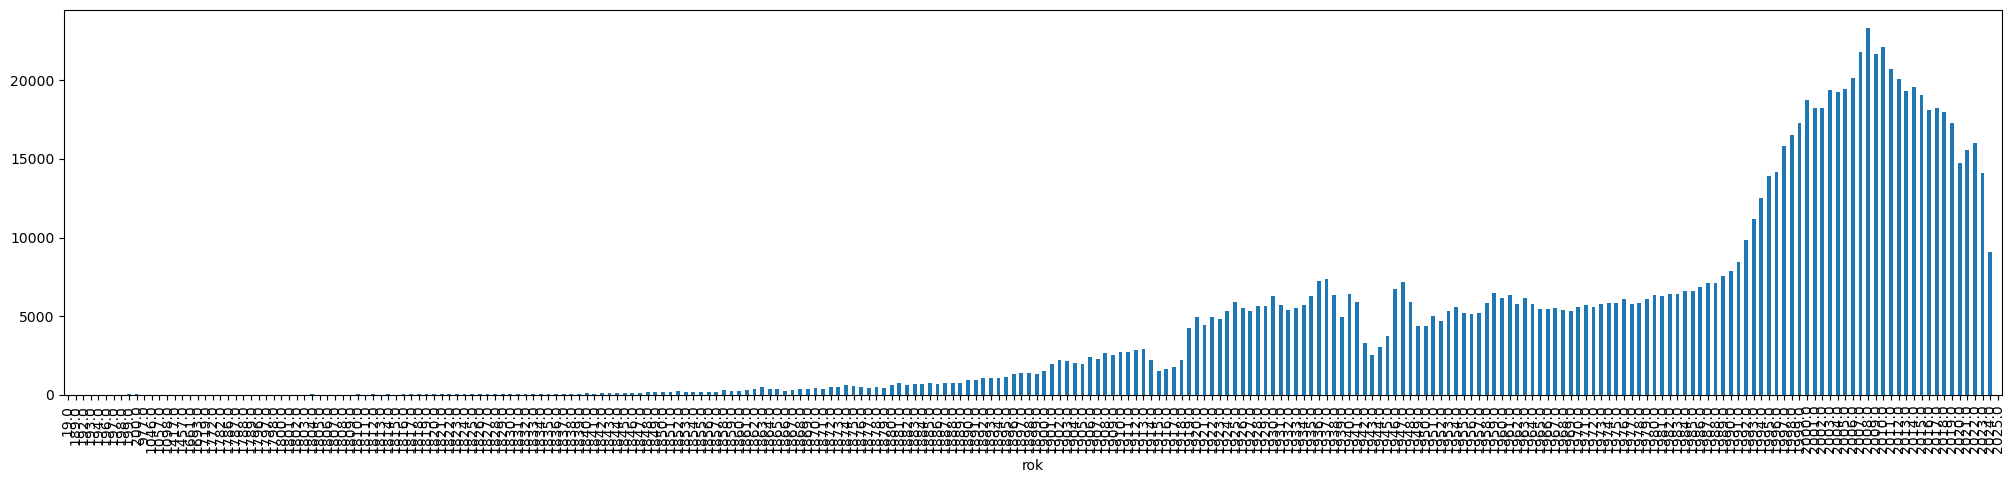

In [25]:
r(df)

In [26]:
df = df[df["leader"].str[6].isin(["a", "t"])]

In [27]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1487, 1901: 1940, poměr: 0.7664948453608248


<Axes: xlabel='rok'>

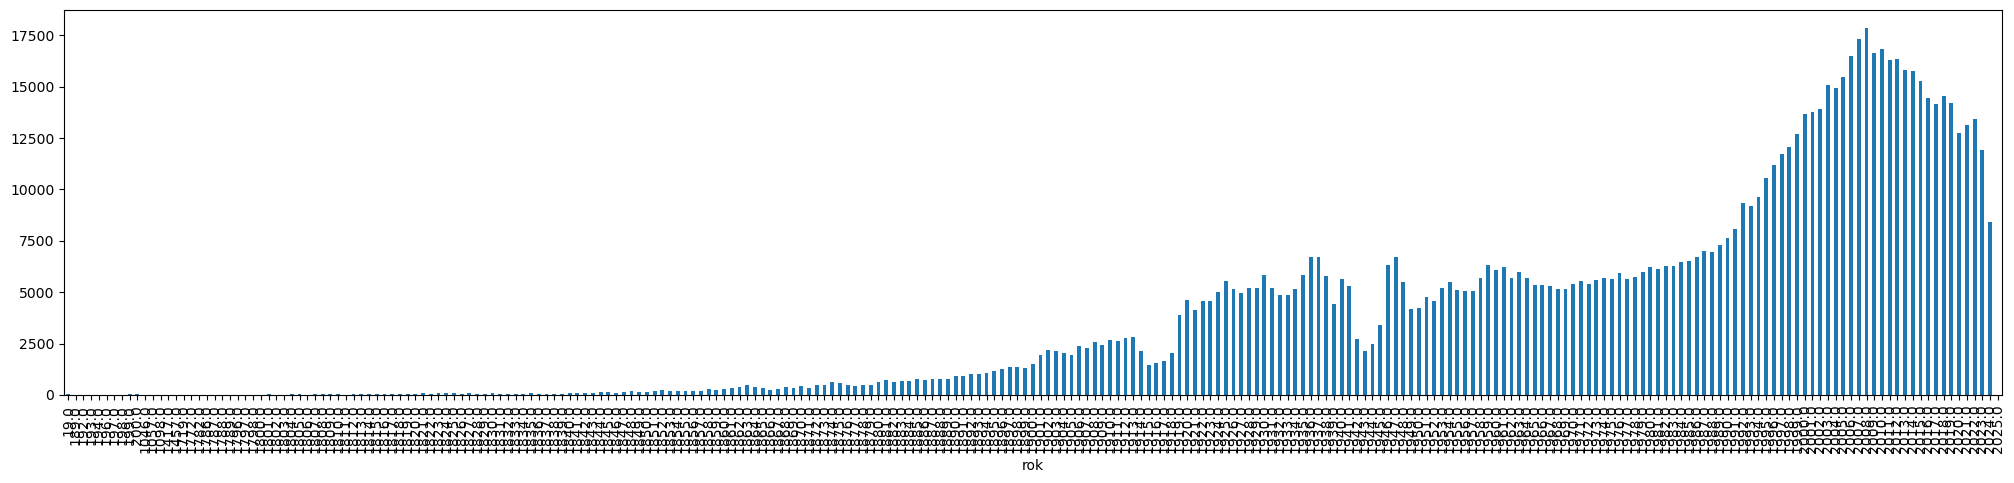

In [28]:
r(df)

In [29]:
df[df['245_a'].astype(str).str.contains('Šikmý kostel',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


In [30]:
df = df[~df["leader"].str[7].isin(["b", "i", "s", " "])]

In [31]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1375, 1901: 1825, poměr: 0.7534246575342466


<Axes: xlabel='rok'>

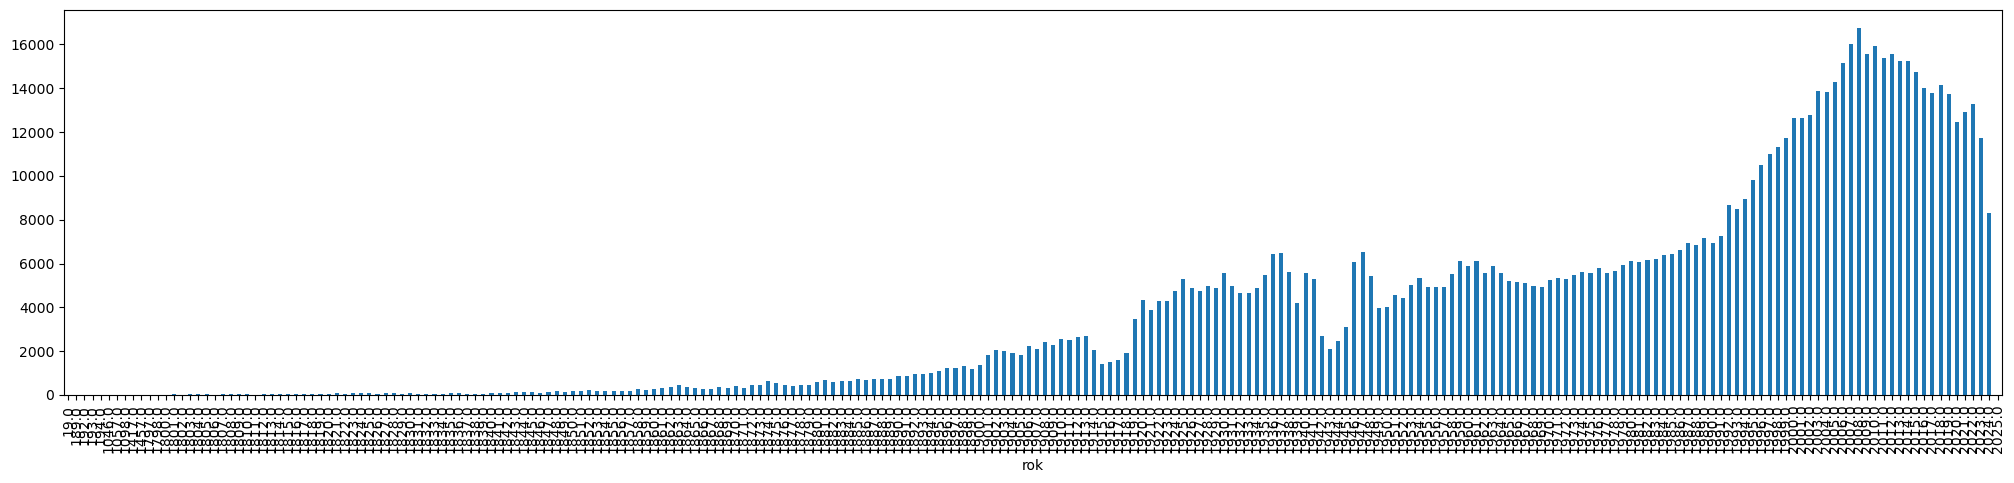

In [32]:
r(df)

In [33]:
df = df.dropna(subset=["rok"])

In [34]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1375, 1901: 1825, poměr: 0.7534246575342466


<Axes: xlabel='rok'>

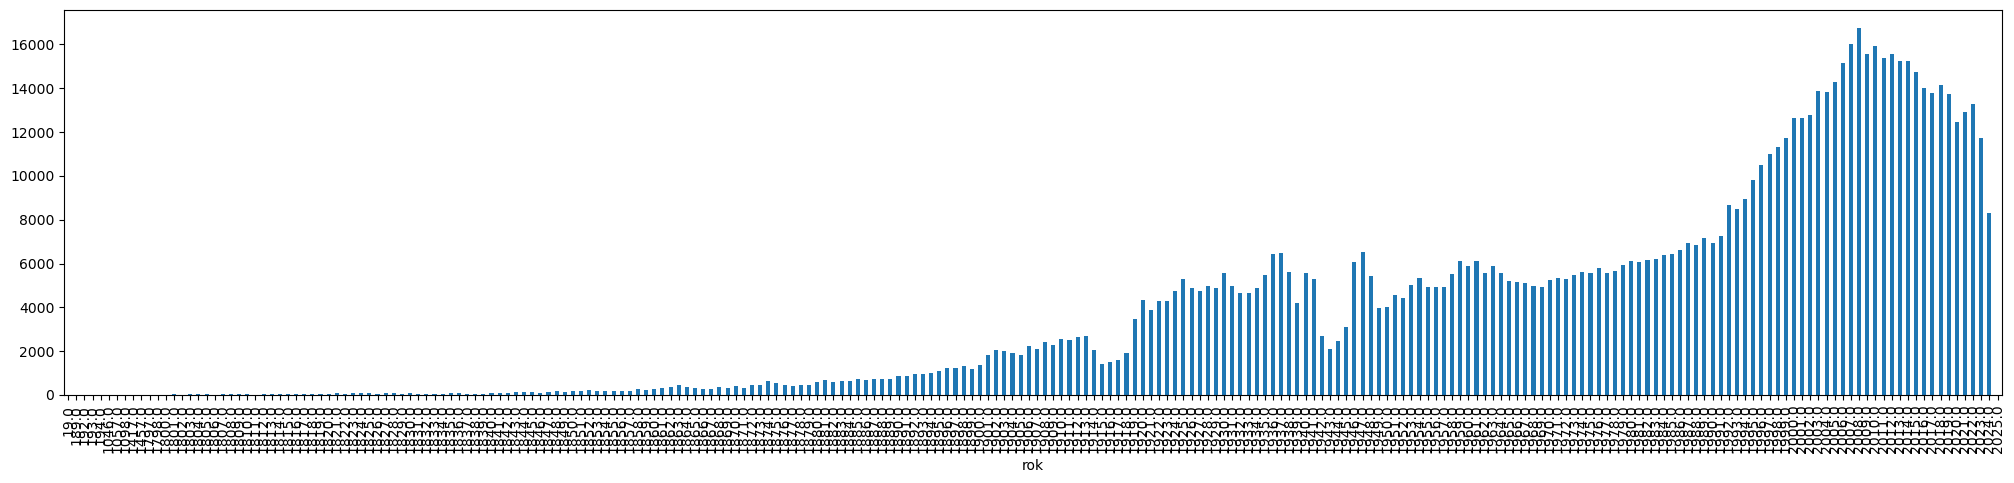

In [35]:
r(df)

In [36]:
df['245_a'].sample(50)

001
bk193606992                                       Galantní šprýmy :
nkc20041492414                                    Život po životě :
cpk19960174326         Transfer inovací, jeho formy a efektivnost /
nkc20172874946                                     Za každou cenu /
bk194103727                                    Palackého třída 27 :
bk196300147                     Dítě v předškolním dětském domově /
cpk20011004328                        O povaze fyzikálních zákonů :
bk197800514                                       Hodinové stroje :
cpk20041283072                                    Mája na venkově /
ck8903306         Literatura jižních Čech mezi světovými válkami...
nkc20061690401                               Boleslavské osobnosti.
cpk20132509609    Z historie národně osvobozeneckého boje a osvo...
np9411768                                      Endokrinochirurgie :
ck8605025             Vývoj počátečního školství v českých zemích :
cpk20000886831    Návody a úkoly k praktický

In [37]:
df.sample(10)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20203222071,201016s2020 xr ab e 001 0 cze d,cam a22 i 4500,1,0,Světem českých rybníků /,None,Ladislav Miček,None,None,None,None,None,"[626.886, 626.88, 626/628(091), (437.3), (048....","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[monografie, fotografické publikace, monograph...","[fd132842, fd132276, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[626/627],[Vodní stavitelství. Vodní hospodářství],[Konspekt],[19],1,"Miček, Ladislav,",pna2010554434,"[aut, pht]",1960-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
nkc20172908656,170718s2017 xr ach e 000 0 cze,nam a22 i 4500,1,0,Auta první republiky :,1918-1938 /,Jan Tuček,None,None,None,None,None,"[629.331.4, 629.331:338.45, 629.331:334.716, 3...","[MRF, MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[přehledy, fotografické publikace, surveys, ph...","[fd133202, fd132276, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[629],[Dopravní prostředky],[Konspekt],[19],1,"Tuček, Jan,",jk01140318,[aut],1953-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
cpk20000976460,001204s1897 xr a e p 000 0 cze,nam a22 a 4500,1,0,Nauka o státním účetnictví v zemích na říšské ...,universitní přednášky v letním semestru /,Karla Blomanna,None,None,None,None,None,"[351.72, 657, 35, (075.8)]","[MRF, MRF, MRF, MRF]",None,None,None,[7],[učebnice vysokých škol],[fd133772],[czenas],None,None,None,None,[7],[657],[Účetnictví],[Konspekt],[4],1,"Blomann, Karel,",jk01012382,[aut],1847-1903,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1897.0
bk194302814,990304s1941 xr cze,nam a22 1 4500,0,0,"Universum Anny Perlíkové, Praha II., Weberova ...","uvádí české i cizí novinky, které se hrály, hr...",None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941.0
bk194101296,990217s1941 xr cze,nam a22 1 4500,1,0,"Z péra Dra Oldřicha Choděry obsáhlé poučení: ""...",None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Choděra, Oldřich,",jn20000620123,[aut],1903-1972,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941.0
nkc20051631680,051116s2005 xr g 000 fdcze,nam a22 a 4500,1,0,Ctnosti války :,román o Alexandrovi Velikém /,Steven Pressfield ; přeložil Vladimír Marek,None,None,None,None,None,"[821.111(73)-31, 355.081, 929.731, (38), (0:82...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[americké romány, historické romány, biografic...","[fd131796, fd132414, fd131905, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.111(73)-3],[Americká próza],[Konspekt],[25],1,"Pressfield, Steven,",mzk2002160580,[aut],1943-,None,None,None,None,1,[cze],[eng],None,None,None,None,None,None,None,None,None,None,NaN,2005.0
nkc20132439600,130131s2012 xr acf e 100 0 cze,nam a22 a 4500,1,0,Sociální rehabilitace versus sociální podnikán...,"sborník z konference v rámci projektu ""Výměnou...",None,None,None,None,None,None,"[364-786, 364-7, 334.012.44, (062.534)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 9]","[sborníky konferencí, proceedings of conferences]","[fd133333, None]","[czenas, eczenas]",None,None,None,None,[7],[364-1/-7],[Druhy sociální pomoci a služeb],[Konspekt],[18],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"[cze, slo]",None,None,None,None,None,None,None,No

In [38]:
df = df.dropna(subset=['245_a','100_a'])
najdi_zub(df)
df['titul'] = df['245_a'].apply(lambda x: x[:-1].strip() if x[-1] in [':','/',';','=','.'] else x.strip())

Hledám zub mezi lety 1900 a 1901.
1900: 1193, 1901: 1535, poměr: 0.7771986970684039


<Axes: xlabel='rok'>

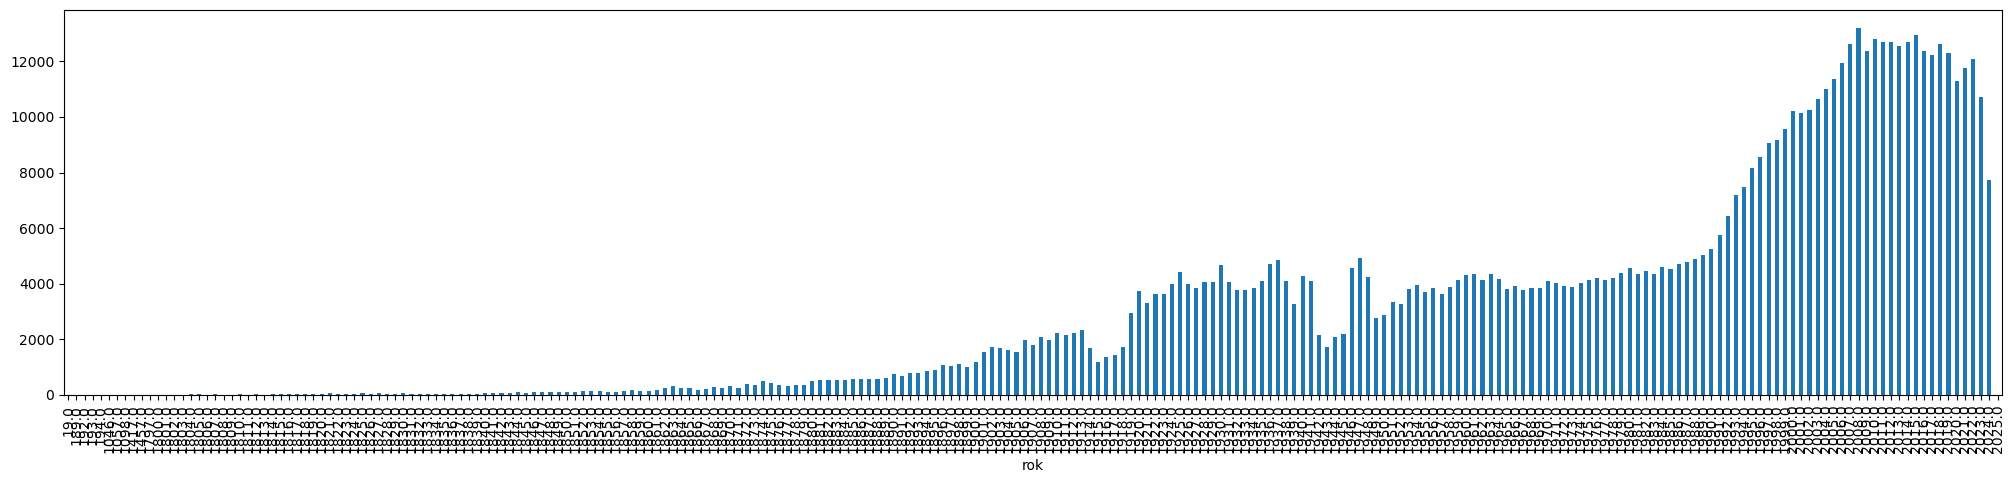

In [39]:
r(df)

## Kontroly divných věcí ze sešitu 112

In [41]:
df[df['245_a'].astype(str).str.contains('Malíř Láďa Rákos')]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Hledání zubu

In [43]:
najdi_zub(df[df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 134, 1901: 62, poměr: 2.161290322580645


In [44]:
najdi_zub(df[df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 134, 1901: 62, poměr: 2.161290322580645


In [45]:
najdi_zub(df[df['080_a'].astype(str).str.contains('821.162.3-3',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 131, 1901: 59, poměr: 2.2203389830508473


In [46]:
najdi_zub(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)])

C:\Users\micha\AppData\Local\Temp\ipykernel_20996\3818377305.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  najdi_zub(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)])


Hledám zub mezi lety 1900 a 1901.
1900: 125, 1901: 52, poměr: 2.4038461538461537


In [47]:
najdi_zub(df[(df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))])

Hledám zub mezi lety 1900 a 1901.
division by zero


In [48]:
najdi_zub(df[df['080_a'].astype(str).str.contains('885-321.')])

Hledám zub mezi lety 1900 a 1901.
division by zero


In [49]:
najdi_zub(df[df['080_a'].astype(str).str.contains('885.0-31',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 1, 1901: 1, poměr: 1.0


In [50]:
najdi_zub(df[((df['008'].str[33] == '1') & (df['041_h'].isnull()))])

Hledám zub mezi lety 1900 a 1901.
1900: 67, 1901: 36, poměr: 1.8611111111111112


## Finální export

In [52]:
najdi_zub(df)
ceska_proza = df[
    df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-3',na=False)
    | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)
    | (df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))
    | df['080_a'].astype(str).str.contains('885-321.')
    | df['080_a'].astype(str).str.contains('885.0-31',na=False)
    | ((df['008'].str[33] == '1') & (df['041_h'].isnull()))
]
## v předchozích fázích tam tyhlety kódované informace nejsou vždycky
## spolehát ještě na 45-83
## 19. století se už 20 let rekatalogizuje
najdi_zub(ceska_proza)
ceska_proza = ceska_proza[ceska_proza['100_a'].notnull()]
najdi_zub(ceska_proza)
ceska_proza['autorstvo'] = ceska_proza['100_a'].apply(lambda x: x.replace(',','').strip() if x != None else None)
ceska_proza['autorstvo_kod'] = ceska_proza['100_7']
ceska_proza2 = ceska_proza.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

Hledám zub mezi lety 1900 a 1901.
1900: 1193, 1901: 1535, poměr: 0.7771986970684039


C:\Users\micha\AppData\Local\Temp\ipykernel_20996\4109413381.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)


Hledám zub mezi lety 1900 a 1901.
1900: 185, 1901: 83, poměr: 2.2289156626506026
Hledám zub mezi lety 1900 a 1901.
1900: 185, 1901: 83, poměr: 2.2289156626506026


In [53]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].sample(20)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
nkc20112258050,2012.0,Pohádky pod polštář,Pospíšilová Zuzana,mzk2006331486
bk196903088,1969.0,Okouzlená růže,Suchánek Jiří,jk01121683
ck8605796,1986.0,Letadlo a desetikoruna,Pražáková Hana,jk01100984
nkc20193121935,2019.0,Rodinné povídky,Mornštajnová Alena,ola2007364886
bk196206102,1962.0,Georgij Markov - Sůl země,Machek Antonín,None
nkc20172928330,2017.0,Hurvínek a kouzelné muzeum,Březinová Ivona,jn19990218010
nkc20193085538,2018.0,O pejskovi a kočičce trochu jinak,Návratová Ivana,jx20100210015
cpk20041298486,2004.0,Když je žena v lázních,Fuchsová Irena,jo2002100653
nkc20112194550,2011.0,Počkej si na zázrak,Stínil Luděk,xx0003294


<Axes: xlabel='rok'>

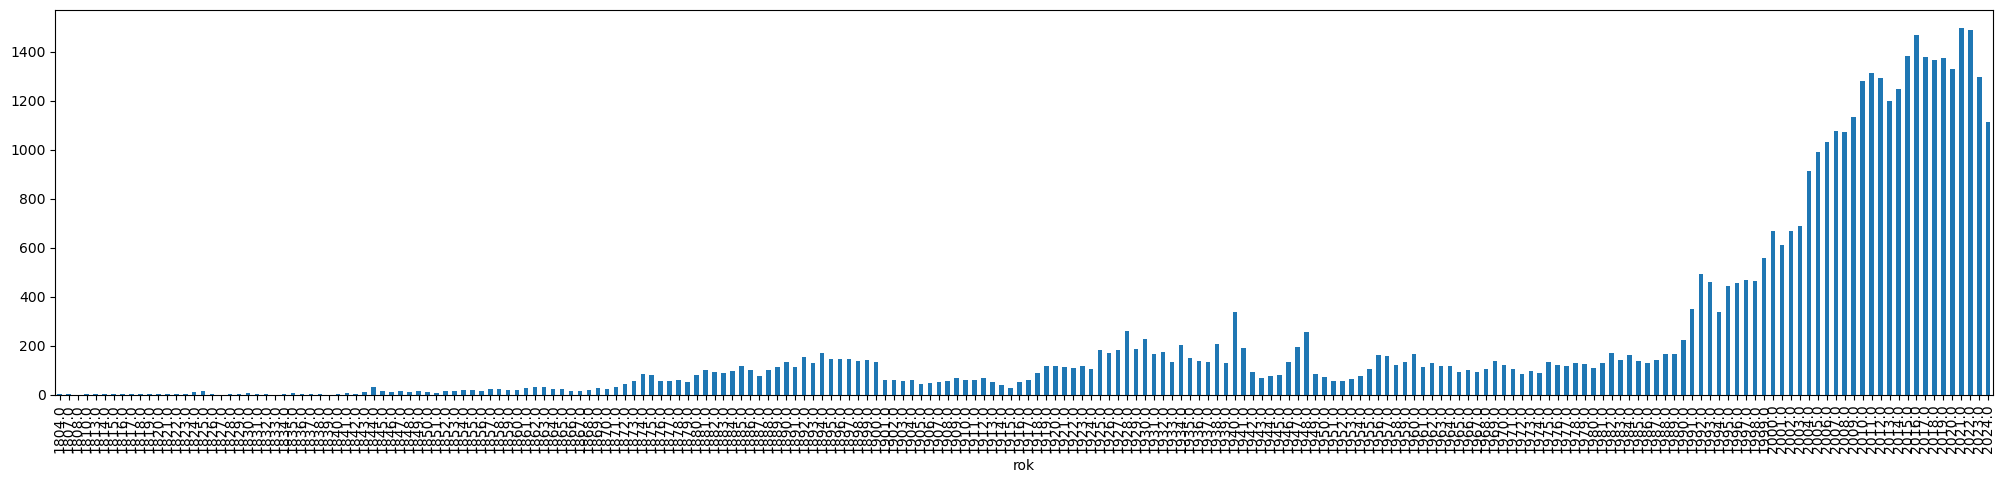

In [54]:
r(ceska_proza2)

In [55]:
ceska_proza2[ceska_proza2['rok'] == 1890].sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknben02913,020119s1890 xr ||| 1 cze,nam a22 1 4500,1,0,U Trúby Štramberské :,historický román /,od Fr. Slámy,None,None,None,None,None,"[821.162.3-31, (0:82-311.6)]","[MRF, MRF]",None,None,None,"[7, 7]","[české romány, historické romány]","[fd133974, fd132414]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Sláma, František,",jk01111770,[aut],1850-1917,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,U Trúby Štramberské,Sláma František,jk01111770
cpk20051499153,050208s1890 xr af j 000 j cze,nam a22 a 4500,1,0,Drobné povídky dějepisné /,None,mládeži napsal Josef Flekáček,None,None,None,None,None,"[821-93, 821.162.3-32]","[MRF, MRF]",None,None,None,"[7, 7]","[české povídky, publikace pro mládež]","[fd133971, fd133157]","[czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Flekáček, Josef,",jk01031426,[aut],1857-1906,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Drobné povídky dějepisné,Flekáček Josef,jk01031426
np9426275,950206s1890 xr g 000 j cze,nam a22 i 4500,1,0,Maloměstské historie,None,None,None,None,None,None,None,"[821.162.3-32, (0:82-321.6)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české povídky, historické povídky, Czech shor...","[fd133971, fd132412, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Jirásek, Alois,",jk01051816,[aut],1851-1930,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Maloměstské historie,Jirásek Alois,jk01051816
nkc20071750962,070910s1890 xr e 000 j cze,nam a22 a 4500,1,0,Zvoňte na mraky :,obrázky z Těšínska /,od Frant. Slámy,None,None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Sláma, František,",jk01111770,[aut],1850-1917,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Zvoňte na mraky,Sláma František,jk01111770
cpk20021087807,020225s1890 xr e 000 f cze,nam a22 a 4500,1,0,Právo lásky :,román /,od Sofie Podlipské,None,None,None,None,None,"[821.162.3-31, (0:82-31)]","[MRF, MRF]",None,None,None,[7],[české romány],[fd133974],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Podlipská, Sofie,",jk01100238,[aut],1833-1897,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Právo lásky,Podlipská Sofie,jk01100238
cpk20051499142,050208s1890 xr af j 000 j cze,nam a22 a 4500,1,0,Povídky pro mladé starožitníky /,None,vypravuje Kliment Čermák,None,None,None,None,None,"[821-93, 821.162.3-32]","[MRF, MRF]",None,None,None,"[7, 7]","[české povídky, publikace pro mládež]","[fd133971, fd133157]","[czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Čermák, Kliment,",jk01021339,[aut],1852-1917,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Povídky pro mladé starožitníky,Čermák Kliment,jk01021339
bknmik10520,021210s1890 xr a 000 1 cze,nam a22 4500,1,0,Z luhův a lesů :,"prostonárodní pověsti, obrázky z přírodopisu a...",sepsal Josef Soukal. Vyprávěnky dítkám / napsa...,None,None,None,None,None,"[821-93, 821.162.3-1, 821.162.3-3, (0:82-1), (...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7

In [56]:
len(ceska_proza2)

47636

In [57]:
ceska_proza2.sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20142584977,140415m18861889xr e 000 j cze,nam a22 aa4500,1,0,Obrázky ze Slovácka /,None,od Gabriely Preissové,None,None,None,None,None,"[821.162.3-32, 908(437.322), (0:82-32)]","[MRF, MRF, MRF]",None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Preissová, Gabriela,",jk01101035,[aut],1862-1946,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1886.0,Obrázky ze Slovácka,Preissová Gabriela,jk01101035
ck8301937,830714s1983 xr a u0|0 cze,nam a22 4500,1,0,Živé vody /,None,Josef Suchomel ; il. a obálku navrhl Jiří Müller,None,None,None,None,None,[885.0-31],[undef],None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Suchomel, Josef,",jk01121715,[aut],1907-1997,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,Živé vody,Suchomel Josef,jk01121715
nkc20142564499,140321s2014 xr a g 000 1 cze d,cam a22 a 4500,1,0,Na odstřel :,komiksová detektivka /,Lucie Lomová,None,None,None,None,None,"[821-312.5, (084.1)]","[MRF, MRF]",None,None,None,"[7, 9]","[komiksy, comics]","[fd131978, None]","[czenas, eczenas]",None,None,None,None,[7],[821-1/-8],[Literatura různých forem a žánrů],[Konspekt],[25],1,"Lomová, Lucie,",xx0026705,"[aut, ill]",1964-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,Na odstřel,Lomová Lucie,xx0026705
nkc20183048318,181030s2018 xr g 000 f cze,nam a22 i 4500,1,0,"Putování do Československa, aneb, ...až já bud...",None,Mariana Slanská Klúz,None,None,None,None,None,"[821.162.3-31, (0:82-31)]","[MRF, MRF]",None,None,None,"[7, 9]","[české romány, Czech fiction]","[fd133974, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Slanská, Mariana",xx0039997,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,"Putování do Československa, aneb, ...až já bud...",Slanská Mariana,xx0039997
cpk20041307923,040316s1866 xr af e 000 1 cze,nam a22 a 4500,1,0,"[Olympus, aneb, Staří pámbíčkové na pensi :","kratičký, zato ale věrný výtah z mythologie Ří...",uspořádali H. Přerhof a E. Züngel],None,None,None,None,None,"[255, (0:82-321.5)]","[MRF, MRF]",None,None,None,[7],[humoristické prózy],[fd132429],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,1,"Přerhof, Heřman,",jk01101494,"[aut, ill]",1831-1867,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1866.0,"[Olympus, aneb, Staří pámbíčkové na pensi",Přerhof Heřman,jk01101494
cpk20021092473,020513s2002 xr a e 000 j cze,nam a22 a 4500,1,0,Polidštění králíka :,jihočeská novela z poloviny minulého století /,[text a ilustrace] Jan Schneider,None,None,None,None,None,"[821.162.3-32, 908(437.31-13)]","[MRF, MRF]",None,None,None,"[7, 9]","[české novely, Czech fiction]","[fd133969, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Schneider, Jan,",jk01111048,"[aut, ill]",1934-2014,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.0,Polidštění králíka,Schneider Jan,jk01111048
cpk20041304551,040123s2004 xr a e 000 j cze d,cam a22 a 4500,1,0,Děravé alibi /,None,Ladislav Beran ; [ilustrace František Doufek],None,None,None,None,None,"[821.162.3-32, (0:82-322.4)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[detektivní povídky, české povídky, Czech shor...","[fd132008, fd133971, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Beran, L

In [58]:
ceska_proza2[ceska_proza2['autorstvo'] == 'Němcová Božena']

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20122433977,121221m18451848xr g 000 f cze,nam a22 ia4500,1,0,Národní báchorky a powěsti /,None,od Boženy Němcowé,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,[7],[české pohádky],[fd133970],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1845.0,Národní báchorky a powěsti,Němcová Božena,jk01083016
cpk20223420309,220509m18541855xr g 000 f cze,nam a22 ia4500,1,0,Národní Báchorky a Pověsti od Boženy Němcové,None,None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[české pověsti, české pohádky]","[fd201456, fd133970]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1854.0,Národní Báchorky a Pověsti od Boženy Němcové,Němcová Božena,jk01083016
bknhak08992,030516s1855 xr e 000 f cze,nam a22 a 4500,1,0,Babička :,obrazy venkovského života /,od Boženy Němcové,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1855.0,Babička,Němcová Božena,jk01083016
cpk20132502523,131002s1856 xr 000 1 cze,nam a22 aa4500,1,0,Pohorská vesnice :,povídka ze života lidu venkovského /,od Boženy Němcové,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1856.0,Pohorská vesnice,Němcová Božena,jk01083016
bknhak09084,030517m18571858xr e 000 1 cze,nam a22 1 4500,1,0,Slovenské pohádky a pověsti.,None,od Boženy Němcové,[Sv. I-X /],None,None,None,None,"[821.162.4-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[slovenské pohádky, slovenské pověsti]","[fd133448, fd219004]","[czenas, czenas]",None,None,None,None,[7],[821.162.4],[Slovenská literatura],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,Slovenské pohádky a pověsti,Němcová Božena,jk01083016
nkc20061643751,060220s1862 xr g 000 m cze,nam a22 a 4500,1,0,Chýže pod horami :,obrázek ze Slovenska ; O dvanácti měsíčkách : ...,od Boženy Němcové,None,None,None,None,None,"[821.162.3-32, 821.162.4-34]","[MRF, MRF]",None,None,None,"[7, 7]","[české povídky, slovenské pohádky]","[fd133971, fd133448]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1862.0,Chýže pod horami,Němcová Božena,jk01083016
bknhak08993,030516s1862 xr ||| 1 cze,nam a22 1 4500,1,0,Babička [a jiné povídky] /,None,Božena Němcová,None,None,None,None,None,"[821.162.3-3, (0:82-3), (081.1)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české prózy, sebrané spisy, Czech prose, coll...","[fd133972, fd133355, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.

In [1]:
nechcemejetam = [
    "jn19990008769",
    "jx20060515016",
    "jn19981002230",
    "jn19981001737",
    "jn19990210182",
    "jn19990001842",
    "jn19990002786",
    "jn19990004346",
    "jn20020721077",
    "jn19990210513",
    "jn19990005488",
    "jo20000080627",
    "jn19990000171",
    "jn20001005715",
    "jn19981002409",
    "jn20000810141"
]

In [ ]:
ceska_proza2 = ceska_proza2[~ceska_proza2["100_7"].isin(nechcemejetam)]

In [59]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_json(os.path.join("data","cnb_ceska_proza.json"), orient="index", indent=4)
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [60]:
ceska_proza2[ceska_proza2['rok'] == 2024].sort_values(by='008', key=lambda x: x.str[:6], ascending=False)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20243644770,241125s2024 xr 000 1 cze,nam a22 i 4500,1,0,Kameny věčných.,None,Veronika Tondrová,None,[Marwolaeth /],None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Tondrová, Veronika",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Kameny věčných,Tondrová Veronika,None
nkc20243643316,241125s2024 xr 000 1 cze d,nam a22 i 4500,1,0,"Věci, které jsem ti nikdy neřekla :",sbírka pezie /,Laura Přečková,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Přečková, Laura",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,"Věci, které jsem ti nikdy neřekla",Přečková Laura,None
nkc20243644768,241125s2024 xr a 000 1 cze,nam a22 i 4500,1,0,Tariel :,z ohně zrozená /,Zdeněk Pelikán,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Pelikán, Zdeněk",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Tariel,Pelikán Zdeněk,None
nkc20243641449,241125s2024 xr a 000 1 cze,nam a22 i 4500,1,0,Tomy a přátelé /,None,Kateřina Sedláčková ; ilustrovala Adéla Radimecká,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Sedláčková, Kateřina,",xx0326267,[aut],1991-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Tomy a přátelé,Sedláčková Kateřina,xx0326267
nkc20243643098,241122s2024 xr a 000 1 cze,nam a22 i 4500,1,0,Parsifal /,None,Jan Dostal (Pavel Křišťan) ; k vydání připravi...,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Dostal, Jan,",jk01022797,[aut],1920-2015,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Parsifal,Dostal Jan,jk01022797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20233550172,230929s2024 xr g 000 j cze,nam a22 i 4500,1,0,Moderní gigolo /,None,Eloise,None,None,None,None,None,"[821.162.3-32, (0:82-321.5)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české příběhy, humoristické příběhy, Czech st...","[fd133973, fd132430, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],0,"Eloise,",xx0321951,[aut],1972-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Moderní gigolo,Eloise,xx0321951
nkc20233548538,230918s2024 xr a b 000 j cze,nam a22 i 4500,1,0,Skřítkové z Adršpašských skal /,None,Klára Končáková ; ilustrace Lucie Gajdošová,None,None,None,None,None,"[821.162.3-32, 821-93, (437.31-17), (0:82-32)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české příběhy, publikace pro děti, Czech stor...","[fd133973, fd133156, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Končáková, Klára,",ola20241237187,[aut],1995-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Skřítkové z Adršpašských skal,Končáková Klára,ola20241237187
nkc20233495253,230125s2024 xr a c 6 000 1bcze,nam a22 i 4500,1,0,Trampoty člověka Sekory :,grafický román - gamebook /,Barbara Šalamounová,None,None,None,None,None,"[821.16